In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree
from imblearn.over_sampling import SMOTE
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("fertilizer_recommendation.csv")
data.head()

,Temparature,Humidity,Soil Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea


In [3]:
data["Fertilizer Name"].unique()

array(['Urea', 'DAP', '14-35-14', '28-28', '17-17-17', '20-20',
       '10-26-26'], dtype=object)

In [4]:
data["Soil Type"].unique()

array(['Sandy', 'Loamy', 'Black', 'Red', 'Clayey'], dtype=object)

In [5]:
data["Crop Type"].unique()

array(['Maize', 'Sugarcane', 'Cotton', 'Tobacco', 'Paddy', 'Barley',
       'Wheat', 'Millets', 'Oil seeds', 'Pulses', 'Ground Nuts'],
      dtype=object)

In [6]:
data.columns

Index(['Temparature', 'Humidity', 'Soil Moisture', 'Soil Type', 'Crop Type',
       'Nitrogen', 'Potassium', 'Phosphorous', 'Fertilizer Name'],
      dtype='object')

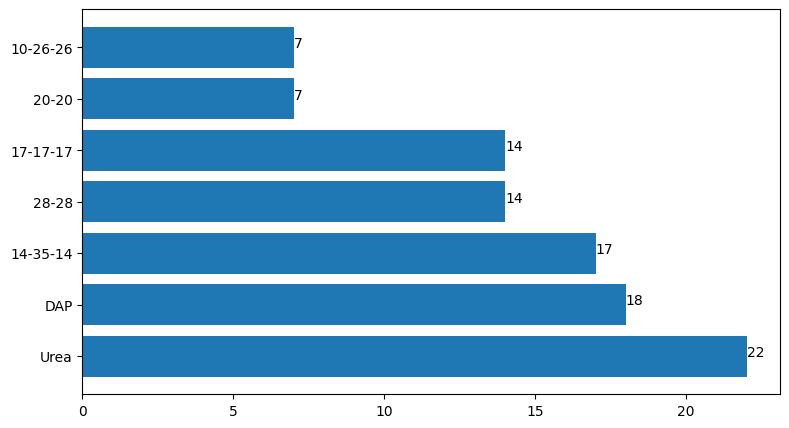

In [7]:
labels = data["Fertilizer Name"].unique()
counts = list(data["Fertilizer Name"].value_counts())

plt.figure(figsize = (9,5))
plt.barh(labels, counts)

for index, value in enumerate(counts):
    plt.text(value, index,
             str(value))
plt.show()

<Axes: >

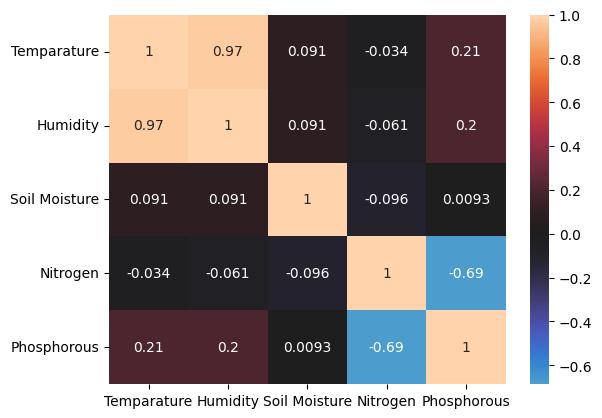

In [8]:
continuous_data_cols = ["Temparature", "Humidity", "Soil Moisture", "Nitrogen", "Phosphorous"] # Removed extra space after "Humidity"
categorical_data_cols = ["Soil Type", "Crop Type"]
sns.heatmap(data[continuous_data_cols].corr(), center = 0, annot = True)

In [9]:
soil_type_label_encoder = LabelEncoder()
data["Soil Type"] = soil_type_label_encoder.fit_transform(data["Soil Type"])

In [10]:
crop_type_label_encoder = LabelEncoder()
data["Crop Type"] = crop_type_label_encoder.fit_transform(data["Crop Type"])

In [11]:
croptype_dict = {}
for i in range(len(data["Crop Type"].unique())):
    croptype_dict[i] = crop_type_label_encoder.inverse_transform([i])[0]
print(croptype_dict)

soiltype_dict = {}
for i in range(len(data["Soil Type"].unique())):
    soiltype_dict[i] = soil_type_label_encoder.inverse_transform([i])[0]
print(soiltype_dict)

{0: 'Barley', 1: 'Cotton', 2: 'Ground Nuts', 3: 'Maize', 4: 'Millets', 5: 'Oil seeds', 6: 'Paddy', 7: 'Pulses', 8: 'Sugarcane', 9: 'Tobacco', 10: 'Wheat'}
{0: 'Black', 1: 'Clayey', 2: 'Loamy', 3: 'Red', 4: 'Sandy'}


In [12]:
fertname_label_encoder = LabelEncoder()
data["Fertilizer Name"] = fertname_label_encoder.fit_transform(data["Fertilizer Name"])

In [13]:
fertname_dict = {}
for i in range(len(data["Fertilizer Name"].unique())):
    fertname_dict[i] = fertname_label_encoder.inverse_transform([i])[0]
print(fertname_dict)

{0: '10-26-26', 1: '14-35-14', 2: '17-17-17', 3: '20-20', 4: '28-28', 5: 'DAP', 6: 'Urea'}


In [14]:
data.head()

,Temparature,Humidity,Soil Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,4,3,37,0,0,6
1,29,52,45,2,8,12,0,36,5
2,34,65,62,0,1,7,9,30,1
3,32,62,34,3,9,22,0,20,4
4,28,54,46,1,6,35,0,0,6


In [15]:
X = data[data.columns[:-1]]
y = data[data.columns[-1]]

In [16]:
counter = Counter(y)
counter

Counter({6: 22, 5: 18, 4: 17, 1: 14, 3: 14, 2: 7, 0: 7})

In [17]:
from imblearn.over_sampling import SMOTE
upsample = SMOTE()
X, y = upsample.fit_resample(X, y)
counter = Counter(y)
print(counter)

Counter({6: 22, 5: 22, 1: 22, 4: 22, 2: 22, 3: 22, 0: 22})


In [18]:
print(f"Total Data after Upsampling: {len(X)}")

Total Data after Upsampling: 154


In [19]:
# Initialzing empty lists to append all model's name and corresponding name
acc = []
model = []

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size = 0.2, random_state = 3)
print(f"Train Data: {X_train.shape}, {y_train.shape}")
print(f"Train Data: {X_test.shape}, {y_test.shape}")

Train Data: (123, 8), (123,)
Train Data: (31, 8), (31,)


**K-NEAREST NEIGHBORS (KNN)**

In [21]:
from sklearn.neighbors import KNeighborsClassifier

In [22]:
KNN = KNeighborsClassifier()
KNN.fit(X_train,y_train)
predicted = KNN.predict(X_test)
x = metrics.accuracy_score(y_test, predicted)
acc.append(x)
model.append('K Nearest Neighbours')
print("KNN Accuracy is: ", x * 100)
print(classification_report(y_test,predicted))

KNN Accuracy is:  96.7741935483871
              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       1.00      1.00      1.00         4
           2       0.83      1.00      0.91         5
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         2

    accuracy                           0.97        31
   macro avg       0.98      0.96      0.97        31
weighted avg       0.97      0.97      0.97        31



**SUPPORT VECTOR MACHINE (SVM)**

In [23]:
from sklearn.svm import SVC

In [24]:
SVC = SVC(probability=True)
SVC.fit(X_train,y_train)
predicted = SVC.predict(X_test)
x = metrics.accuracy_score(y_test, predicted)
acc.append(x)
model.append('SVC')
print("SVC Accuracy is: ", x * 100)
print(classification_report(y_test,predicted))

SVC Accuracy is:  90.32258064516128
              precision    recall  f1-score   support

           0       0.60      0.75      0.67         4
           1       1.00      1.00      1.00         4
           2       0.75      0.60      0.67         5
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         2

    accuracy                           0.90        31
   macro avg       0.91      0.91      0.90        31
weighted avg       0.91      0.90      0.90        31



**RANDOM  FOREST CLASSIFIER**

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
RF = RandomForestClassifier()
RF.fit(X_train,y_train)
predicted = RF.predict(X_test)
x = metrics.accuracy_score(y_test,predicted)
acc.append(x)
model.append('Random Forest')
print("Random Forest Accuracy is ",x * 100)
print(classification_report(y_test,predicted))

Random Forest Accuracy is  100.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         2

    accuracy                           1.00        31
   macro avg       1.00      1.00      1.00        31
weighted avg       1.00      1.00      1.00        31



**XG BOOST CLASSIFIER**

In [27]:
import xgboost as xgb

In [28]:
XB = xgb.XGBClassifier(eval_metric='mlogloss')
XB.fit(X_train,y_train)
predicted = XB.predict(X_test)
x = metrics.accuracy_score(y_test,predicted)
acc.append(x)
model.append('XG Boost')
print('XG Boost Accuracy is ',x * 100)
print(classification_report(y_test,predicted))

XG Boost Accuracy is  100.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         2

    accuracy                           1.00        31
   macro avg       1.00      1.00      1.00        31
weighted avg       1.00      1.00      1.00        31



**ACCURACY COMPARISION**

<Axes: title={'center': 'Accuracy Comparision'}, xlabel='Accuracy', ylabel='Algorithms'>

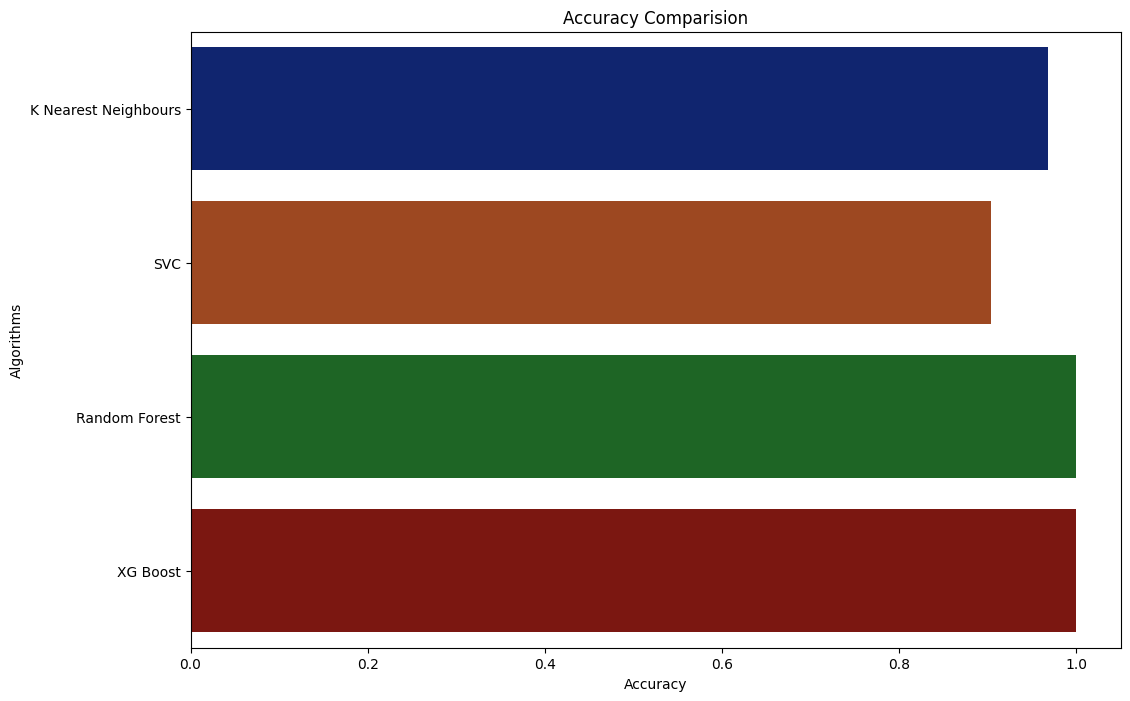

In [29]:
plt.figure(figsize = [12,8],dpi = 100)
plt.title('Accuracy Comparision')
plt.xlabel('Accuracy')
plt.ylabel('Algorithms')
sns.barplot(x = acc,y = model,palette = 'dark')

In [30]:
accuracy_models = dict(zip(model,acc))
for k,v in accuracy_models.items():
  print(k,'-->',v* 100,'%')

K Nearest Neighbours --> 96.7741935483871 %
SVC --> 90.32258064516128 %
Random Forest --> 100.0 %
XG Boost --> 100.0 %


**CONCLUSION**

We are using Random Forest Classifier because of its accuracy and precision

In [31]:
import joblib

In [32]:
filename='fertilizer_app.pkl'

In [33]:
joblib.dump(RF, 'fertilizer_app.pkl')

['fertilizer_app.pkl']

In [34]:
app=joblib.load('fertilizer_app.pkl')